In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import geopy
from geopy import Nominatim
import folium
%matplotlib inline

In [ ]:
df = pd.read_csv('energy.csv')
df.head(20)

,BUILDING ADDRESS,BUILDING ID,CARBON DIOXIDE EMISSIONS (Metric Ton CO2e),COMPLIANCE STATUS,% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI,% DIFFERENCE FROM NATIONAL MEDIAN SITE EUI,ENERGY STAR SCORE,ENERGY STAR CERTIFICATION - ELIGIBILITY,ENERGY STAR CERTIFICATION - LAST APPROVAL DATE,ENERGY STAR CERTIFICATION - YEAR(S) CERTIFIED,...,PROGRAM YEAR,PROPERTY TYPE,SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²),Source EUI (kBtu/ft²),TOTAL WATER USE (kgal),WEATHER NORMALIZED SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²),WEATHER NORMALIZED SOURCE ENERGY USE INTENSITY (EUI) (kBtu/ft²),YEAR BUILT,AIN,LADBS Building Category
0,11340 W OLYMPIC BLVD,427804836294,170.6,COMPLIED,-47.8,-47.8,90,Yes,Not Available,Not Available,...,2020,Office,30.3,84.9,1052.3,Not Available,Not Available,1975.0,017,"50,000 to 99,999 sqft"
1,854 S OXFORD AVE,468490842935,146.1,NOT COMPLIED,-22.2,-22.2,82,Yes,Not Available,Not Available,...,2020,Multifamily Housing,49.9,79.1,3.2,50.8,80,1929.0,002,"50,000 to 99,999 sqft"
2,1615 N MARTEL AVE,455587859077,33.5,COMPLIED,-52.8,-52.8,100,No,Not Available,Not Available,...,2020,Multifamily Housing,20,40.3,837.1,20,40.3,1961.0,015,"20,000 to 49,999 sqft"
3,1625 STONER AVE,423570837725,24.2,COMPLIED,-70.2,-70.2,100,Yes,Not Available,Not Available,...,2020,Multifamily Housing,13.8,24.1,1303.9,13.9,24.2,1960.0,022,"20,000 to 49,999 sqft"
4,9344 NATIONAL BLVD,441759833953,47.2,COMPLIED,-4.2,-4.2,56,No,Not Available,Not Available,...,2019,Multifamily Housing,32.3,67.6,692.7,32.3,67.7,1971.0,011,"20,000 to 49,999 sqft"
5,10947 PENDLETON ST,449507910574,50.7,NOT COMPLIED,-62.1,-62.1,92,Yes,01/14/2021,"2020, 2019",...,2020,Non-Refrigerated Warehouse,8.8,24.7,683.7,8.8,24.7,1990.0,014,"50,000 to 99,999 sqft"
6,6251 RESEDA BLVD,399397889856,72.8,COMPLIED,-26.5,-26.5,88,Yes,Not Available,Not Available,...,2020,Multifamily Housing,29,77,2311.5,29,77,1960.0,007,"20,000 to 49,999 sqft"
7,10937 PENDLETON ST,449768910608,56.6,NOT COMPLIED,-16.5,-16.5,60,No,01/14/2021,"2020, 2019",...,2020,Non-Refrigerated Warehouse,13.3,35.4,240.1,13.4,35.5,1990.0,015,"50,000 to 99,999 sqft"
8,1247 STONER AVE,422107839876,73.3,NOT COMPLIED,-32.8,-32.8,96,No,09/16/2020,2020,...,2020,Multifamily Housing,29.5,53.2,1572.4,29.6,53.3,1987.0,063,"20,000 to 49,999 sqft"
9,13335 SATICOY ST,433593898759,44.7,COMPLIED,-41.2,-41.2,Not Available,No,Not Available,Not Available,...,2020,Other,18.7,52.5,196.7,17.9,50.1,1972.0,011,"20,000 to 49,999 sqft"


In [ ]:
colList = df.dtypes
print(colList)

BUILDING ADDRESS                                                    object
BUILDING ID                                                          int64
CARBON DIOXIDE EMISSIONS (Metric Ton CO2e)                          object
COMPLIANCE STATUS                                                   object
% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI                        object
% DIFFERENCE FROM NATIONAL MEDIAN SITE EUI                          object
ENERGY STAR SCORE                                                   object
ENERGY STAR CERTIFICATION - ELIGIBILITY                             object
ENERGY STAR CERTIFICATION - LAST APPROVAL DATE                      object
ENERGY STAR CERTIFICATION - YEAR(S) CERTIFIED                       object
ENTITY RESPONSIBLE FOR BENCHMARK                                    object
GROSS BUILDING FLOOR AREA (ft²)                                    float64
INDOOR WATER USE (kgal)                                             object
INDOOR WATER USE INTENSIT

In [ ]:
test_loc = str(df["BUILDING ADDRESS"][0])
print(test_loc)

11340 W OLYMPIC BLVD


In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_request")
 
#applying geocode method to get the location
location = geolocator.geocode(test_loc)

In [ ]:
print(location.address)
print(location.latitude)
print(location.longitude)

11340, West Olympic Boulevard, Sawtelle Japantown, Sawtelle, Los Angeles, Los Angeles County, California, 90064, United States
34.0373278
-118.441567


In [ ]:
m=folium.Map(location=[34.0373278, -118.441567])
folium.Marker([34.0373278, -118.441567],
icon=folium.Icon(color='black',icon_color='red')


).add_to(m)
m

In [ ]:
f = float(df["Source EUI (kBtu/ft²)"][0])
print(f)

84.9


In [ ]:
df2 = df.sample(frac=0.02, replace=True, random_state=1)
df2.head()

,BUILDING ADDRESS,BUILDING ID,CARBON DIOXIDE EMISSIONS (Metric Ton CO2e),COMPLIANCE STATUS,% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI,% DIFFERENCE FROM NATIONAL MEDIAN SITE EUI,ENERGY STAR SCORE,ENERGY STAR CERTIFICATION - ELIGIBILITY,ENERGY STAR CERTIFICATION - LAST APPROVAL DATE,ENERGY STAR CERTIFICATION - YEAR(S) CERTIFIED,...,PROGRAM YEAR,PROPERTY TYPE,SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²),Source EUI (kBtu/ft²),TOTAL WATER USE (kgal),WEATHER NORMALIZED SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²),WEATHER NORMALIZED SOURCE ENERGY USE INTENSITY (EUI) (kBtu/ft²),YEAR BUILT,AIN,LADBS Building Category
33003,5112 SEPULVEDA BLVD,420719882301,132.8,COMPLIED,-4.9,-4.9,57,No,Not Available,Not Available,...,2019,Multifamily Housing,35.2,91.2,483.2,35.2,91.2,1952.0,022,"50,000 to 99,999 sqft"
12172,4343 TOLAND WAY,494729866950,NaN,NOT COMPLIED,NaN,NaN,NaN,NaN,NaN,NaN,...,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,016,"20,000 to 49,999 sqft"
5192,9148 TELFAIR AVE,442112908476,NaN,NOT COMPLIED,NaN,NaN,NaN,NaN,NaN,NaN,...,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,038,"20,000 to 49,999 sqft"
32511,1441 MIDVALE AVE,427754842294,98.3,COMPLIED,-46.1,-46.1,100,Yes,Not Available,Not Available,...,2018,Multifamily Housing,32,48.7,1860.7,32.6,48.7,1987.0,033,"50,000 to 99,999 sqft"
7813,1546 GORDON ST,464981858740,NaN,NOT COMPLIED,NaN,NaN,NaN,NaN,NaN,NaN,...,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,034,"20,000 to 49,999 sqft"


In [ ]:
ult = {}
cur = -1
for address in df2["BUILDING ADDRESS"]:
    cur += 1
    test_loc = str(list(df2["BUILDING ADDRESS"])[cur])
    try:
        lat = geolocator.geocode(test_loc).latitude
        long_ = geolocator.geocode(test_loc).longitude
    except:
        continue
    
    eui = list(df2["Source EUI (kBtu/ft²)"])[cur]
    #print(type(eui))
    if type(eui) == float:
        continue
    try:
        eui = float(eui)
    except:
        continue
    
    
    if (type(lat) != float or type(long_) != float):
        continue
    

    ult[eui] = [lat, long_]
    

print(len(ult))
    



372


In [ ]:
ult

{91.2: [33.9319029, -118.3960272],
 48.7: [34.0538283, -118.44207440894755],
 11.2: [33.858435962121206, -118.3036677197049],
 29.9: [34.0503276, -118.23237886206957],
 8.0: [34.20218974647887, -118.387879],
 14.4: [34.100900153846155, -118.34130653846154],
 35.7: [41.906654827048285, -80.77620768257839],
 130.4: [33.9319029, -118.3960272],
 52.3: [34.04917750430199, -118.47315187966048],
 99.1: [34.225136040816324, -118.58861648979592],
 19.6: [34.10421479120879, -118.30064819780219],
 60.0: [34.05492457142857, -118.2747620612245],
 14.3: [34.24486065771812, -118.59423048322148],
 92.5: [34.03974707142857, -118.34197135714285],
 83.6: [34.20313036206896, -118.44009056896552],
 188.1: [40.5769952, -73.9714141],
 58.0: [34.242838, -118.606307],
 72.4: [34.02333328571429, -118.40106334693878],
 6.5: [40.9099952, -73.8196473],
 10.1: [34.20507227272727, -118.40701472727272],
 64.9: [34.30638140705385, -118.46093691639226],
 108.4: [40.008606313341154, -104.94249781315261],
 81.9: [34.1628

In [ ]:
m2=folium.Map(location=[34.0373278, -118.441567])

for key,value in ult.items():
    if key < 50:
        folium.Marker([value[0], value[1]],icon=folium.Icon(color='black',icon_color='green')).add_to(m2)
    else:
        folium.Marker([value[0], value[1]],icon=folium.Icon(color='black',icon_color='red')).add_to(m2)

m2

In [ ]:
# for scale use boxp
# ML Goal: 

### Data Cleanup

<AxesSubplot:>

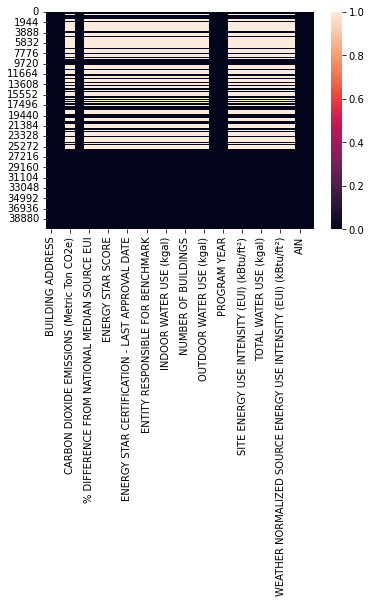

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
'''
building address
last approval date energy star
maybe the entity
postal code
the one in between these two
property type
year built
ledbs bulding category
'''

df3 = df.drop('BUILDING ADDRESS', axis=1)
df4 = df3.drop('POSTAL CODE', axis=1)
df5 = df4.drop('ENERGY STAR CERTIFICATION - LAST APPROVAL DATE', axis = 1)
df6 = df5.drop('LADBS Building Category', axis=1 )
df7 = df6.drop('YEAR BUILT',axis=1 )
df7.head()

,BUILDING ID,CARBON DIOXIDE EMISSIONS (Metric Ton CO2e),COMPLIANCE STATUS,% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI,% DIFFERENCE FROM NATIONAL MEDIAN SITE EUI,ENERGY STAR SCORE,ENERGY STAR CERTIFICATION - ELIGIBILITY,ENERGY STAR CERTIFICATION - YEAR(S) CERTIFIED,ENTITY RESPONSIBLE FOR BENCHMARK,GROSS BUILDING FLOOR AREA (ft²),...,OCCUPANCY,OUTDOOR WATER USE (kgal),PROGRAM YEAR,PROPERTY TYPE,SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²),Source EUI (kBtu/ft²),TOTAL WATER USE (kgal),WEATHER NORMALIZED SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²),WEATHER NORMALIZED SOURCE ENERGY USE INTENSITY (EUI) (kBtu/ft²),AIN
0,427804836294,170.6,COMPLIED,-47.8,-47.8,90,Yes,Not Available,Transwestern,84850.0,...,75.0,Not Available,2020,Office,30.3,84.9,1052.3,Not Available,Not Available,017
1,468490842935,146.1,NOT COMPLIED,-22.2,-22.2,82,Yes,Not Available,Unknown,51234.0,...,100.0,Not Available,2020,Multifamily Housing,49.9,79.1,3.2,50.8,80,002
2,455587859077,33.5,COMPLIED,-52.8,-52.8,100,No,Not Available,"Vert Energy Group, Inc.",27777.0,...,100.0,Not Available,2020,Multifamily Housing,20,40.3,837.1,20,40.3,015
3,423570837725,24.2,COMPLIED,-70.2,-70.2,100,Yes,Not Available,Unknown,30095.0,...,100.0,Not Available,2020,Multifamily Housing,13.8,24.1,1303.9,13.9,24.2,022
4,441759833953,47.2,COMPLIED,-4.2,-4.2,56,No,Not Available,Unknown,24000.0,...,95.0,Not Available,2019,Multifamily Housing,32.3,67.6,692.7,32.3,67.7,011


<AxesSubplot:>

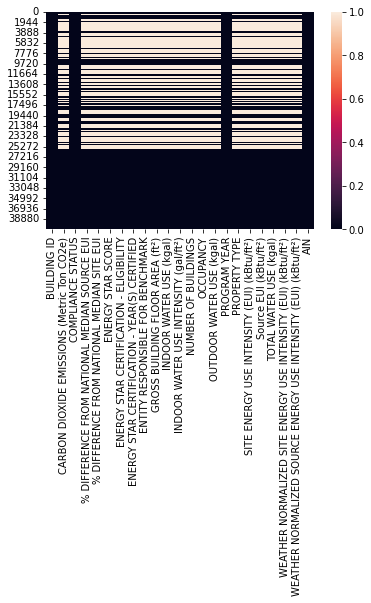

In [ ]:
sns.heatmap(df7.isnull())

In [ ]:
pd.get_dummies(data=df7, prefix=colList, )

ValueError: Length of 'prefix' (28) did not match the length of the columns being encoded (18).

In [ ]:
sns.boxplot(data=df7, x='', y='ENERGY STAR SCORE')

In [ ]:
# impute the columns

def impute_ess(column):
    

## Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('ENERGY STAR CERTIFICATION - ELIGIBILITY'), df['ENERGY STAR CERTIFICATION - ELIGIBILITY'], test_size=0.30, train_size=0.70, random_state=10)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
predictions = model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
# next: prep dataset for ml, generate some more exploratory data analysis graphs. 
# Also research the national threshold for safe/efficient energy usage and use that as the geoplotting metric

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=20008831-a030-4e89-91a7-5067b0a1728f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>